In [254]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing --------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Machine learning -----------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# Metrics --------------------------------------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# INFO

# Purchase
# A factor with levels CH and MM indicating whether the customer purchased Citrus Hill or Minute Maid Orange Juice
# WeekofPurchase
# Week of purchase
# StoreID
# Store ID
# PriceCH
# Price charged for CH
# PriceMM
# Price charged for MM
# DiscCH
# Discount offered for CH
# DiscMM
# Discount offered for MM
# SpecialCH
# Indicator of special on CH
# SpecialMM
# Indicator of special on MM
# LoyalCH
# Customer brand loyalty for CH
# SalePriceMM
# Sale price for MM
# SalePriceCH
# Sale price for CH
# PriceDiff
# Sale price of MM less sale

In [212]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/orange_juice_withmissing.csv')

In [213]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [214]:
df_raw.sample(10)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
998,CH,254,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.544000,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
217,CH,267,7.0,1.86,2.13,0.00,0.00,1.0,0.0,0.983956,2.13,1.86,0.27,Yes,0.000000,0.000000,0.27,0.0
980,CH,233,7.0,1.75,1.99,0.00,0.40,1.0,0.0,0.400000,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0.0
370,MM,267,1.0,1.86,1.99,0.00,0.20,0.0,1.0,0.491072,1.79,1.86,-0.07,No,0.100503,0.000000,0.13,1.0
48,CH,246,4.0,1.99,2.23,0.00,0.00,0.0,0.0,0.886992,2.23,1.99,0.24,No,0.000000,0.000000,0.24,4.0
78,CH,252,2.0,1.89,2.09,0.13,0.00,0.0,0.0,0.868928,2.09,1.76,0.33,No,0.000000,0.068783,0.20,2.0
243,CH,260,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.941212,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0
300,CH,234,3.0,1.79,2.09,0.00,0.00,0.0,0.0,0.299008,2.09,1.79,0.30,No,0.000000,0.000000,0.30,3.0
210,CH,258,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.923496,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
143,MM,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.480000,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [215]:
df_raw.to_csv('../data/raw/raw_data.csv')

In [216]:
df_processed = df_raw.copy()

In [217]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [218]:
#Remove Null entries
df_processed.isna().sum()

Purchase          0
WeekofPurchase    0
StoreID           1
PriceCH           1
PriceMM           4
DiscCH            2
DiscMM            4
SpecialCH         2
SpecialMM         5
LoyalCH           5
SalePriceMM       5
SalePriceCH       1
PriceDiff         1
Store7            0
PctDiscMM         5
PctDiscCH         2
ListPriceDiff     0
STORE             2
dtype: int64

In [219]:
df_processed = df_processed.dropna(axis=0, how='any') #drop every row were there is column with a Nan value

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1032 non-null   object 
 1   WeekofPurchase  1032 non-null   int64  
 2   StoreID         1032 non-null   float64
 3   PriceCH         1032 non-null   float64
 4   PriceMM         1032 non-null   float64
 5   DiscCH          1032 non-null   float64
 6   DiscMM          1032 non-null   float64
 7   SpecialCH       1032 non-null   float64
 8   SpecialMM       1032 non-null   float64
 9   LoyalCH         1032 non-null   float64
 10  SalePriceMM     1032 non-null   float64
 11  SalePriceCH     1032 non-null   float64
 12  PriceDiff       1032 non-null   float64
 13  Store7          1032 non-null   object 
 14  PctDiscMM       1032 non-null   float64
 15  PctDiscCH       1032 non-null   float64
 16  ListPriceDiff   1032 non-null   float64
 17  STORE           1032 non-null   float6

In [220]:
df_processed.sample(10)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
929,MM,236,3.0,1.79,2.09,0.0,0.0,0.0,0.0,0.163840,2.09,1.79,0.30,No,0.000000,0.000000,0.30,3.0
787,CH,273,3.0,1.99,2.09,0.0,0.4,0.0,0.0,0.053687,1.69,1.99,-0.30,No,0.191388,0.000000,0.10,3.0
248,CH,268,7.0,1.86,2.13,0.0,0.0,0.0,0.0,0.980736,2.13,1.86,0.27,Yes,0.000000,0.000000,0.27,0.0
577,CH,250,7.0,1.86,2.09,0.0,0.0,0.0,0.0,0.500000,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0.0
220,CH,274,2.0,1.96,2.18,0.0,0.8,0.0,1.0,0.991785,1.38,1.96,-0.58,No,0.366972,0.000000,0.22,2.0
592,CH,254,7.0,1.86,2.18,0.0,0.0,0.0,0.0,0.733760,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
921,CH,269,2.0,1.86,2.18,0.0,0.0,0.0,0.0,0.616000,2.18,1.86,0.32,No,0.000000,0.000000,0.32,2.0
1059,CH,235,1.0,1.69,1.99,0.0,0.0,0.0,0.0,0.619072,1.99,1.69,0.30,No,0.000000,0.000000,0.30,1.0
653,CH,261,2.0,1.86,2.18,0.0,0.0,0.0,0.0,0.955728,2.18,1.86,0.32,No,0.000000,0.000000,0.32,2.0
712,MM,264,3.0,1.99,2.09,0.1,0.0,0.0,0.0,0.000254,2.09,1.89,0.20,No,0.000000,0.050251,0.10,3.0


In [221]:
#Search for Categorical Columns
df_processed['StoreID'].value_counts()

StoreID
7.0    348
2.0    216
3.0    182
1.0    154
4.0    132
Name: count, dtype: int64

In [222]:
df_processed['SpecialCH'].value_counts()

SpecialCH
0.0    876
1.0    156
Name: count, dtype: int64

In [223]:
df_processed['SpecialMM'].value_counts()

SpecialMM
0.0    865
1.0    167
Name: count, dtype: int64

In [224]:
df_processed['Store7'].value_counts()

Store7
No     684
Yes    348
Name: count, dtype: int64

In [225]:

df_processed['STORE'].value_counts()

STORE
0.0    348
2.0    216
3.0    182
1.0    154
4.0    132
Name: count, dtype: int64

In [226]:
df_processed['Purchase'].value_counts()
#El dataset está desbalanceado.

Purchase
CH    636
MM    396
Name: count, dtype: int64

In [227]:
#De la informacion anterior se puede determinar que la informacion contenida en las variables STORE y Store7, se obtiene de la variable StoreID,
# por lo que se decide eliminar STORE y Store7.

#También, PriceDiff resulta ser la resta de SalePriceMM - SalePriceCH
#Por lo que se decide eliminar PriceDiff, pues una combinacion lineal.

#PctDiscMM is proportional to DiscMM
#PctDiscCH is proportional to DiscCH

#Por último, ListPriceDiff también es una combinacion lineal de PriceMM - PriceCH

In [228]:
df_processed = df_processed.drop(['STORE','Store7','PriceDiff', 'ListPriceDiff', 'PctDiscMM', 'PctDiscCH'],axis=1)

df_processed.sample(10)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH
414,MM,238,3.0,1.79,2.09,0.00,0.0,0.0,0.0,0.145350,2.09,1.79
289,MM,264,3.0,1.99,2.09,0.10,0.0,0.0,0.0,0.000774,2.09,1.89
439,CH,251,1.0,1.76,2.09,0.00,0.0,0.0,0.0,0.480000,2.09,1.76
421,MM,261,3.0,1.99,2.09,0.00,0.0,0.0,0.0,0.030482,2.09,1.99
547,MM,235,2.0,1.69,1.99,0.00,0.0,0.0,0.0,0.109052,1.99,1.69
1001,MM,263,2.0,1.86,2.18,0.00,0.0,0.0,1.0,0.320000,2.18,1.86
661,CH,266,7.0,1.86,2.13,0.37,0.0,1.0,0.0,0.680000,2.13,1.49
47,CH,245,4.0,1.99,2.23,0.00,0.0,0.0,0.0,0.858739,2.23,1.99
450,MM,263,2.0,1.86,2.18,0.00,0.0,0.0,1.0,0.445279,2.18,1.86
211,CH,259,7.0,1.86,2.18,0.00,0.0,0.0,0.0,0.938797,2.18,1.86


In [229]:
#Convert Variables to Categoricals
df_processed['Purchase'] = pd.Categorical(df_processed['Purchase'])
df_processed['StoreID'] = pd.Categorical(df_processed['StoreID'])
df_processed['SpecialCH'] = pd.Categorical(df_processed['SpecialCH'])
df_processed['SpecialMM'] = pd.Categorical(df_processed['SpecialMM'])


In [230]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 0 to 1069
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1032 non-null   category
 1   WeekofPurchase  1032 non-null   int64   
 2   StoreID         1032 non-null   category
 3   PriceCH         1032 non-null   float64 
 4   PriceMM         1032 non-null   float64 
 5   DiscCH          1032 non-null   float64 
 6   DiscMM          1032 non-null   float64 
 7   SpecialCH       1032 non-null   category
 8   SpecialMM       1032 non-null   category
 9   LoyalCH         1032 non-null   float64 
 10  SalePriceMM     1032 non-null   float64 
 11  SalePriceCH     1032 non-null   float64 
dtypes: category(4), float64(7), int64(1)
memory usage: 77.2 KB


In [231]:
df_processed.to_csv('../data/processed/processed_data.csv')

In [232]:
X = df_processed.copy().drop(['Purchase'],axis=1)
y = df_processed['Purchase'].copy()

In [233]:
X.sample(10)

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH
199,277,7.0,1.99,2.13,0.5,0.0,0.0,1.0,0.999934,2.13,1.49
689,228,3.0,1.79,1.79,0.0,0.0,0.0,0.0,0.042950,1.79,1.79
300,234,3.0,1.79,2.09,0.0,0.0,0.0,0.0,0.299008,2.09,1.79
333,236,7.0,1.75,1.99,0.0,0.4,0.0,0.0,0.119538,1.59,1.75
417,257,3.0,1.99,2.29,0.0,0.4,0.0,1.0,0.074419,1.89,1.99
894,257,7.0,1.86,2.18,0.0,0.0,0.0,0.0,0.795200,2.18,1.86
588,234,7.0,1.75,1.99,0.0,0.4,1.0,0.0,0.600000,1.59,1.75
509,258,3.0,1.99,2.29,0.0,0.0,0.0,0.0,0.919469,2.29,1.99
77,251,4.0,1.99,2.23,0.0,0.0,0.0,0.0,0.836160,2.23,1.99
1002,227,3.0,1.79,1.79,0.0,0.0,0.0,1.0,0.163840,1.79,1.79


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1400, test_size=0.2)

In [235]:
df_train = pd.concat([X_train, y_train], axis=1)

In [236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 547 to 86
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   WeekofPurchase  825 non-null    int64   
 1   StoreID         825 non-null    category
 2   PriceCH         825 non-null    float64 
 3   PriceMM         825 non-null    float64 
 4   DiscCH          825 non-null    float64 
 5   DiscMM          825 non-null    float64 
 6   SpecialCH       825 non-null    category
 7   SpecialMM       825 non-null    category
 8   LoyalCH         825 non-null    float64 
 9   SalePriceMM     825 non-null    float64 
 10  SalePriceCH     825 non-null    float64 
 11  Purchase        825 non-null    category
dtypes: category(4), float64(7), int64(1)
memory usage: 61.8 KB


In [237]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WeekofPurchase,825.0,NaN,NaN,NaN,254.538182,15.668093,227.0,240.0,257.0,269.0,278.0
StoreID,825.0,5.0,7.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PriceCH,825.0,NaN,NaN,NaN,1.867673,0.102484,1.69,1.79,1.86,1.99,2.09
PriceMM,825.0,NaN,NaN,NaN,2.088412,0.132453,1.69,2.09,2.13,2.18,2.29
DiscCH,825.0,NaN,NaN,NaN,0.051212,0.117229,0.0,0.0,0.0,0.0,0.5
DiscMM,825.0,NaN,NaN,NaN,0.125455,0.216131,0.0,0.0,0.0,0.24,0.8
SpecialCH,825.0,2.0,0.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpecialMM,825.0,2.0,0.0,693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoyalCH,825.0,NaN,NaN,NaN,0.572255,0.308184,0.000011,0.331072,0.6,0.863466,0.999947
SalePriceMM,825.0,NaN,NaN,NaN,1.962958,0.253888,1.19,1.69,2.09,2.18,2.29


In [ ]:
# WeekofPurchase should be Categorical?

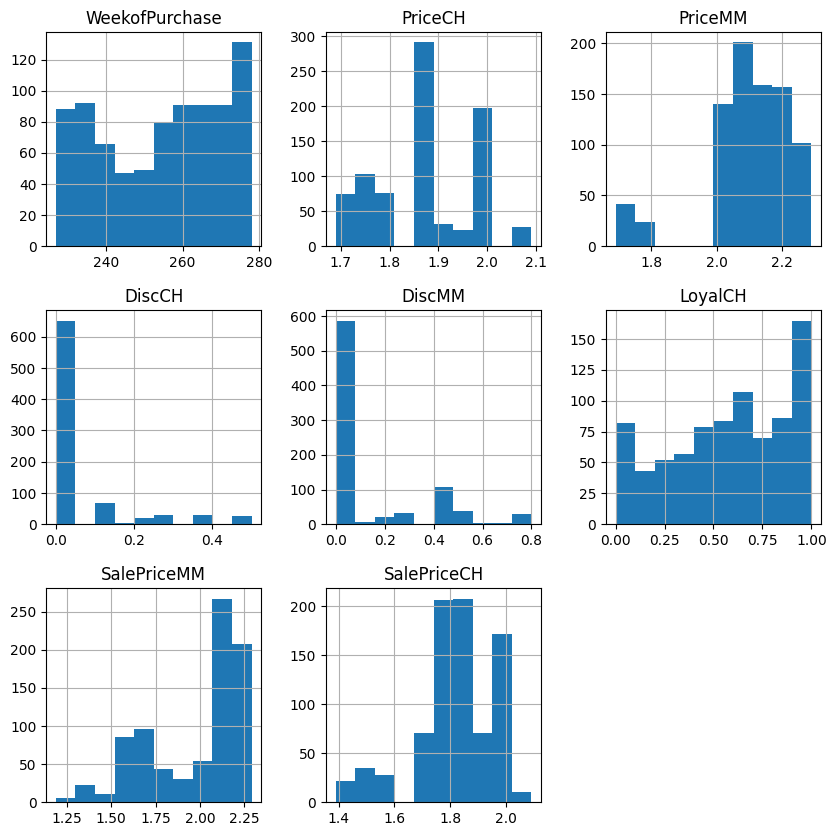

In [238]:
#Analisys for Numerical Variables
df_train.hist(figsize=(10,10))
plt.show()

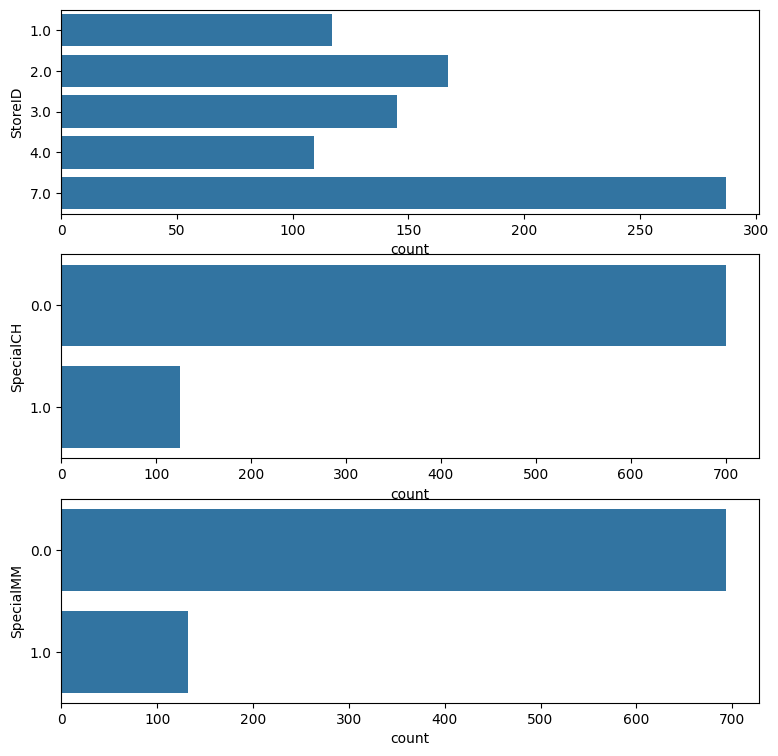

In [239]:
#Analisis univariado de variables categoricas

cats = df_train.select_dtypes('category') #cats de categoricas. select_dtypes get only columns for type

fig,ax = plt.subplots(3, 1, figsize = (9,9))

axs = ax.flatten() #flatten para no darle coordenadas, solo los indices

for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax = axs[i])

plt.show()

In [240]:
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH
WeekofPurchase,1.000000,0.696663,0.567846,0.358458,0.252232,0.201736,0.081523,0.202542
PriceCH,0.696663,1.000000,0.619802,0.133633,0.130951,0.071336,0.211872,0.598611
PriceMM,0.567846,0.619802,1.000000,0.064425,-0.003546,0.126718,0.524716,0.385894
DiscCH,0.358458,0.133633,0.064425,1.000000,0.034101,0.142602,0.004581,-0.713861
DiscMM,0.252232,0.130951,-0.003546,0.034101,1.000000,0.003829,-0.853133,0.064970
LoyalCH,0.201736,0.071336,0.126718,0.142602,0.003829,1.000000,0.062849,-0.064856
SalePriceMM,0.081523,0.211872,0.524716,0.004581,-0.853133,0.062849,1.000000,0.146012
SalePriceCH,0.202542,0.598611,0.385894,-0.713861,0.064970,-0.064856,0.146012,1.000000


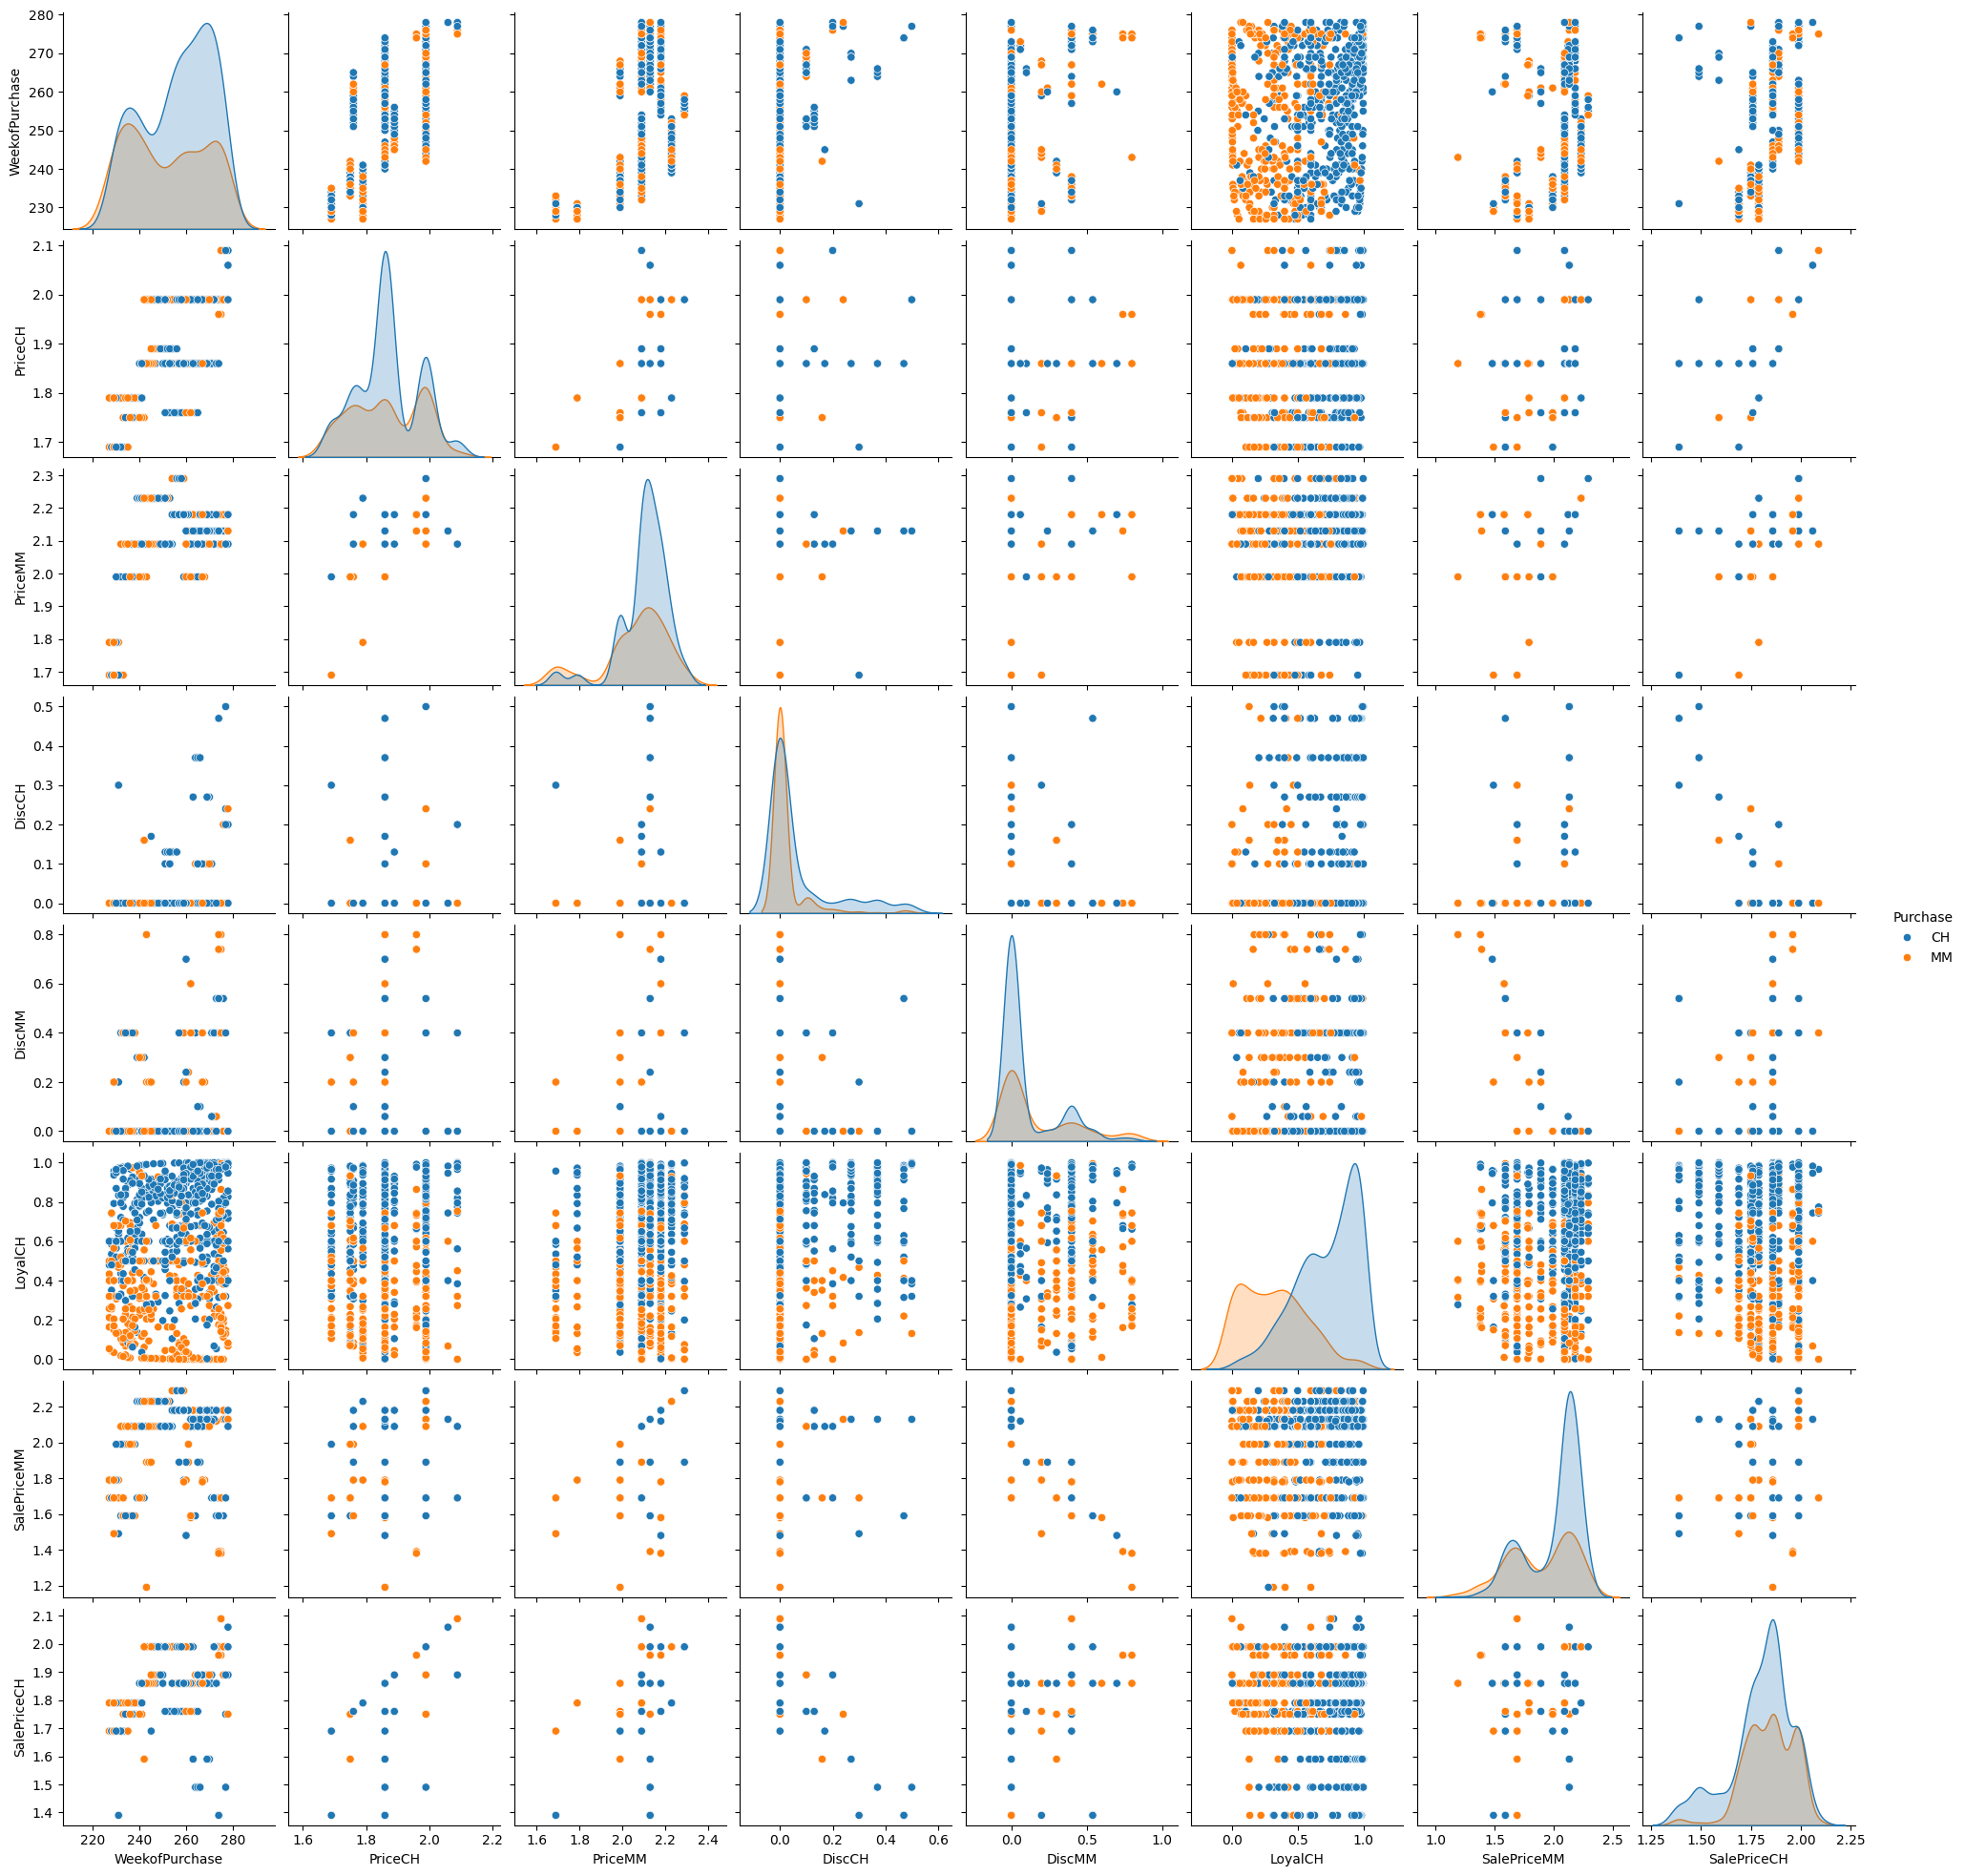

In [241]:
pplot = sns.pairplot(data=df_train, hue='Purchase')

plt.show()

In [242]:
# 4. Model Training and Prediction
cat_cols = X_train.select_dtypes('category').columns #cat_cols variables categoricas
num_cols = X_train.select_dtypes('number').columns   # num_cols variables numericas

In [243]:
# 4.1. Create Pipeline

cat_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False)) #sparse son varias columnas, con false las comprime 
])
#onehot convierte las variables categoricas a numeros.
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())    # escala los datos a una media de cero y un rango unitario (desviación)
])
#StandardScaler se usa este escaler porque las variables son casi simetricas.

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [244]:
ramdom_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=2200, class_weight='balanced', n_estimators=100, n_jobs=-1))
])

ramdom_forest_model.fit(X_train,y_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Clases/orange_juice_classification/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['StoreID', 'SpecialCH', 'SpecialMM'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=2200))])

In [245]:
y_hat_tr = ramdom_forest_model.predict(X_test)

print(f"Accuracy Random Forest: {accuracy_score(y_test, y_hat_tr)}")

Accuracy Random Forest: 0.7922705314009661


              precision    recall  f1-score   support

          CH       0.81      0.84      0.83       122
          MM       0.76      0.72      0.74        85

    accuracy                           0.79       207
   macro avg       0.79      0.78      0.78       207
weighted avg       0.79      0.79      0.79       207



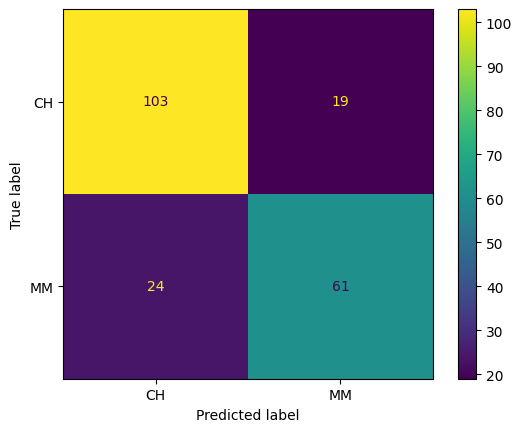

In [255]:

print(classification_report(y_test,y_hat_tr))

cm = confusion_matrix(y_test, y_hat_tr)

ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=ramdom_forest_model.classes_
                       ).plot()
plt.show()

In [246]:
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=2137, class_weight='balanced'))
])

decision_tree_model.fit(X_train, y_train)


/home/arnaldochm/Documents/BootCamp_DataScience/Clases/orange_juice_classification/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['StoreID', 'SpecialCH', 'SpecialMM'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=2137))])

In [247]:
y_hat_dtc = decision_tree_model.predict(X_test)
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_hat_dtc)}")

Accuracy Decision Tree: 0.7294685990338164


In [248]:
pca = PCA(n_components=2, random_state=1910)

In [249]:
X_train_pcaed = pca.fit_transform(X_train)
X_test_pcaed = pca.fit_transform(X_test)

In [250]:
#Create PCA Dataframe

pca_train_df = pd.DataFrame()

pca_train_df['x_0'] = X_train_pcaed[:,0]
pca_train_df['x_1'] = X_train_pcaed[:,1]
pca_train_df['target'] = y_train.reset_index(drop=True)

pca_train_df.sample(10)

,x_0,x_1,target
496,20.494350,-3.287970,MM
8,-0.449695,1.039431,CH
651,24.494492,-3.267234,CH
695,0.568974,2.038087,CH
243,-11.503871,-2.861818,CH
200,-19.460766,0.310045,CH
125,-11.443403,1.215741,MM
475,-14.504461,-2.823659,CH
772,13.550391,0.841532,CH
613,24.493020,-3.277119,CH


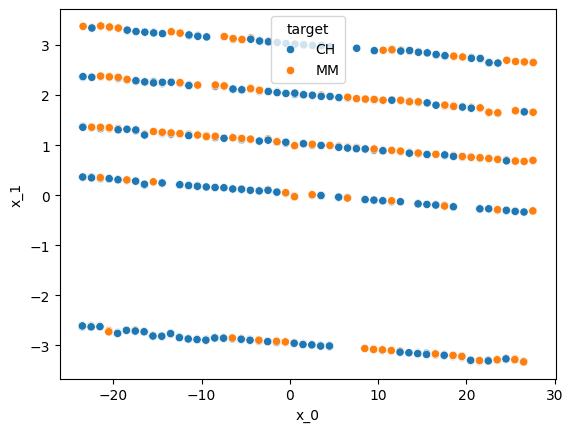

In [251]:
sns.scatterplot(data=pca_train_df, x='x_0', y='x_1', hue='target')
plt.show()

In [252]:
model_rf = RandomForestClassifier(random_state=1930, n_estimators=100, n_jobs=-1)

model_rf.fit(X_train_pcaed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1930)

In [253]:
y_hat_rf = model_rf.predict(X_test_pcaed)
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_hat_rf)}")

Accuracy Random Forest: 0.46859903381642515
